# Приоритизация гипотез и анализ A/B-теста интернет-магазина

Исходные данные:

/datasets/hypothesis.csv
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

/datasets/orders.csv
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

/datasets/visitors.csv
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

## Приоритизация гипотез

В датасете /datasets/hypothesis.csv представлено 9 гипотез по увеличению выручки интернет-магазина. Нам требуется определить приоритетные гипотезы для проверки.

Для начала рассмотрим данные.

In [1]:
# импорт библиотек для работы с данными

import pandas as pd
import numpy as np
import datetime as dt

# импорт библиотек для визуализации

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

# импорт библиотек для статистических вычислений

from scipy import stats as st

In [2]:
# создание переменной с датасетом
pd.set_option('max_colwidth', 100)

try:
    hypothesis = pd.read_csv('hypothesis.csv')
except FileNotFoundError:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Всего представлено 9 гипотез, параметры оценки в 10-бальной шкале. Применим методы ICE и RICE для приоритизации.

Сначала посчитаем оценку ICE, где 
\begin{equation}
ICE = \frac{impact * confidence}
{efforts} 
\end{equation} и отсортируем гипотезы по приоритету

In [3]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


С оценкой 16,2 на первом месте по приоритетности гипотеза - "запустить акцию, дающую скидку на товар в день рождения", самая низкая по приоритету - "имзенить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей".

Теперь рассмотрим приоритет гипотез по методу RICE, где добавляется еще один параметр оценки - reach (охват), то есть на какое количество людей повлияет указанное в гипотезе изменение:

\begin{equation}
RICE = \frac{rearch * impact * confidence}{efforts}
\end{equation}

In [4]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts']
hypothesis[['Hypothesis', 'ICE', 'RICE']].sort_values(by=['RICE','ICE'], ascending=[False, False])

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


Визуализируем изменения при помощи slope graph.

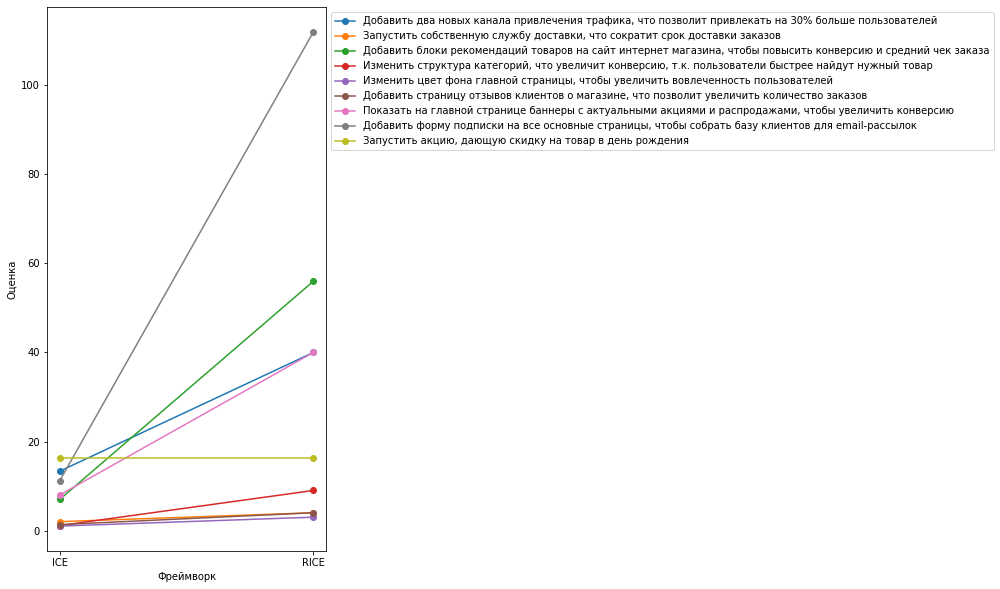

In [5]:
# создание датасета для визуализации

ice = hypothesis[['Hypothesis', 'ICE']].set_index('Hypothesis')
ice.columns = ['Score']
ice_dict = ice.to_dict(orient='index')
hypothesis_one = pd.DataFrame(ice_dict).T
hypothesis_one['Framework'] = 'ICE'

rice = hypothesis[['Hypothesis', 'RICE']].set_index('Hypothesis')
rice.columns = ['Score']
rice_dict = rice.to_dict(orient='index')
hypothesis_two = pd.DataFrame(rice_dict).T
hypothesis_two['Framework'] = 'RICE'

hypothesis_visual = pd.concat([hypothesis_one, hypothesis_two]).reset_index().rename(columns={'index':'Hypothesis'})

# построение slope graph
hypothesis_list = hypothesis['Hypothesis'].tolist()

fig, ax = plt.subplots(1, figsize=(5,10))
for i in hypothesis_list:
    temp = hypothesis_visual[hypothesis_visual['Hypothesis'] == i]
    plt.plot(temp.Framework, temp.Score, marker='o', label = i)

plt.xticks(['ICE','RICE'])
plt.xlabel('Фреймворк')
plt.ylabel('Оценка')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

По методу RICE приоритет гипотез изменился, на первом месте с большим отрывом по оценке - гипотеза "добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", при этом по методу ICE она была на 3 месте. Гипотеза №2 стала второй, а по методу ICE она была в середине списка - пятая.

Мы можем отсеять гипотезы №№ 1,3,4,5 , так как в обоих оценках они находятся в конце списка по приоритету с низкими RICE и ICE scores.

Приоритет гипотез в начале списка разный, так как при оценке RICE появился новый параметр reach, умножение на который увеличивает оценку ICE в 1 - 10 раз, в зависимости от оценки по данному параметру. На примере гипотезы №7 и №2 мы видим, что высокая оценка reach позволила стать им самыми приоритетными, а гипотезе №8 с охватом, оцененным в 1 балл, не приумножить имеющуюся оценку по ICE и поэтому занять место в середине списка по методу RICE.

## Анализ A/B теста

### Предобработка данных

Интернет-магазин провел A/B-тест для подтверждения одной из выбранных гипотез. После проведения теста нам переданы следующие данные:
- /datasets/orders.csv
- /datasets/visitors.csv

Изучим данные и проанализируем проведенный A/B-тест.

In [6]:
# загрузка данных в переменные и просмотр таблиц
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    display(orders.sample(5))
    display(visitors.sample(5))
except FileNotFoundError:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
    display(orders.sample(5))
    display(visitors.sample(5))

,transactionId,visitorId,date,revenue,group
437,2291372207,2968526225,2019-08-28,2000,B
989,4035028498,721509856,2019-08-28,190,A
395,2552819381,678354126,2019-08-28,880,A
36,2165344951,2805132315,2019-08-15,2470,B
1157,3716304192,2695379936,2019-08-14,590,A


,date,group,visitors
3,2019-08-04,A,717
48,2019-08-18,B,737
14,2019-08-15,A,628
10,2019-08-11,A,718
25,2019-08-26,A,722


В таблице orders информация о совершенных заказах за определенный период времени, столбец transactionId содержит уникальные идентификаторы заказов, visitorId - уникальные идентификаторы пользователей, совершивших заказ, date - дата совершения заказа, revenue - выручка с данного заказа, group - принадлежность к группе теста (A или B).

В таблице visitors представлена информация о количестве пользователей в конкретную дату, где столбец date - дата, group - принадлежность к группе теста (A или B), visitors - общее количество пользователей в указанную дату, относящихся к опредленной группе A/B-теста.

Проведем предобработку данных, в датасетах посмотрим количество дубликатов и пропусков

In [7]:
# поиск пропусков в исходных данных

print(orders.isna().sum())
print(visitors.isna().sum())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


Пропуски отсутствуют. Проверим дубликаты

In [8]:
# поиск явных дубликатов

print('Количество дубликатов в таблице заказов: {}'.format(orders.duplicated().sum()))
print('Количество дубликатов в таблице количества пользователей по датам: {}'.format(visitors.duplicated().sum()))

Количество дубликатов в таблице заказов: 0
Количество дубликатов в таблице количества пользователей по датам: 0


In [9]:
# поиск пользователей, попавших в обе группы

duplicated_users = orders.groupby('visitorId').agg({'group':['nunique']})
duplicated_users.columns = ['groups']
duplicated_users = duplicated_users.query('groups > 1')
print(len(duplicated_users))

# очистка таблицы от пользователей, попавших в обе группы

orders = orders.query('visitorId not in @duplicated_users.index')

58


Изменим формат дат в таблицах для удобства

In [10]:
# преобразование строк в столбце date в формат datetime64

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Аналитическая оценка данных A/B-теста

#### Сбор кумулятивных данных

Подготовив исходные данные мы можем приступить к анализу результатов A/B-теста, рассмотрим следующие метрики и их изменение в для исключения проблемы подсматривания:
- куммулятивную выручку по группам;
- куммулятивный средний чек по группам и его относительное изменение;
- куммулятивную конверсию по группам и ее относительное изменение;
- количество заказов по пользователям;
- стоимость заказов.

Соберем накопленные метрики в одну таблицу, где каждая строка будет соответствовать дню и группе, имеющей представленные в таблице метрики: выручку, количество заказов, покупателей, посетителей интернет-магазина, средний чек и конверсию.

In [11]:
# создание таблицы с датой и группой теста

dates_groups = orders[['date', 'group']].drop_duplicates().sort_values(by='date')
dates_groups

# агрегируем данные по количеству транзакций, покупателей и выручке накопительно от первой до конечной даты

orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg(
    {'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}
    ), axis = 1).sort_values(by=['date','group'])

# агрегируем данные по количеству посетителей

visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg(
    {'date':'max', 'group':'max', 'visitors':'sum'}
    ), axis=1).sort_values(by=['date','group'])

Мы собрали кумулятивные данные о количестве покупок, пользователей, выручке и количеству посетителей. Полученные данные объединяем в единый датафрейм по дате и группе, а также дополним данные столбцами со средним чеком и конверсией

In [12]:
# объединение полученных кумулятивных данных, добавление значения конверсии

cumulative_data = orders_aggregated.merge(visitors_aggregated, how='left', on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulative_data['conversion'] = round((cumulative_data['buyers'] / cumulative_data['visitors']), 4)

cumulative_data

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.0264
1,2019-08-01,B,17,17,59758,713,0.0238
2,2019-08-02,A,42,36,234381,1338,0.0269
3,2019-08-02,B,40,39,221801,1294,0.0301
4,2019-08-03,A,66,60,346854,1845,0.0325
...,...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708,0.0277
58,2019-08-30,A,460,437,3311413,18037,0.0242
59,2019-08-30,B,531,511,4955833,18198,0.0281
60,2019-08-31,A,468,445,3364656,18736,0.0238


Данные получены, перейдем к построению графиков и анализу результатов

#### Анализ графиков накопленных метрик

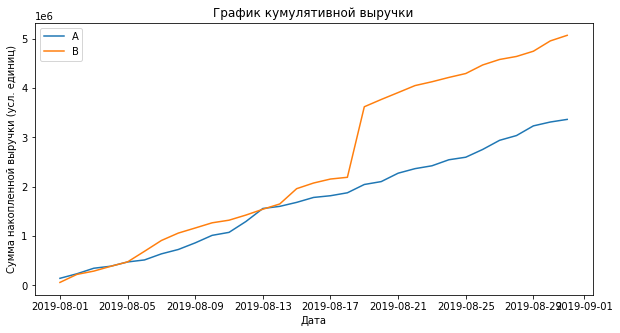

In [13]:
# отключение ошибки
import warnings
warnings.filterwarnings("ignore")

# создание датафреймов для каждой группы

cumulative_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_B = cumulative_data[cumulative_data['group'] == 'B']

# графики выручки
plt.figure(figsize=(10,5))
plt.plot(cumulative_A['date'], cumulative_A['revenue'], label = 'A')
plt.plot(cumulative_B['date'], cumulative_B['revenue'], label = 'B')
plt.legend()
plt.title('График кумулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Сумма накопленной выручки (усл. единиц)')
plt.show()

Выручка растет равномерно до середины месяца, график группы B имеет резкий рост в середине месяца, что может сигнализировать о всплеске числа заказов, либо о появлении аномально дорогих заказов в данный период, так как после всплеска рост обоих графиков симметричен.

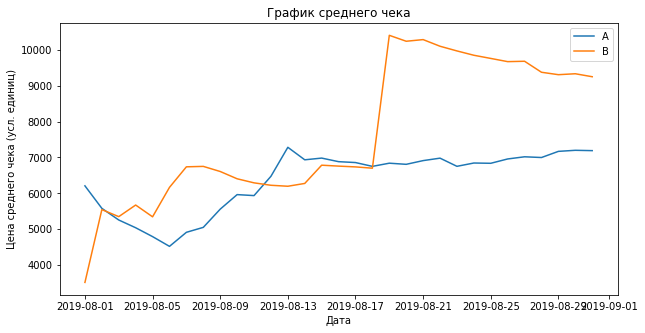

In [14]:
# график среднего чека по группам

plt.figure(figsize=(10,5))
plt.plot(cumulative_A['date'], cumulative_A['revenue']/cumulative_A['orders'], label = 'A')
plt.plot(cumulative_B['date'], cumulative_B['revenue']/cumulative_B['orders'], label = 'B')
plt.legend()
plt.title('График среднего чека')
plt.xlabel('Дата')
plt.ylabel('Цена среднего чека (усл. единиц)')
plt.show()

Средний чек группы B также имеет резкий рост в ту же дату, что и на графике кумулятивной выручки, и затем идет равномерно вниз, что подтверждает присутствие заказов с аномально высокой стоимостью у группы B. Также, мы видим, что рост не равномерный и говорить о том, что средний чек группы B до очистки данных от аномалий не можем.

Рассмотрим график относительного изменения кумулятивного среднего чека группы B к группе A

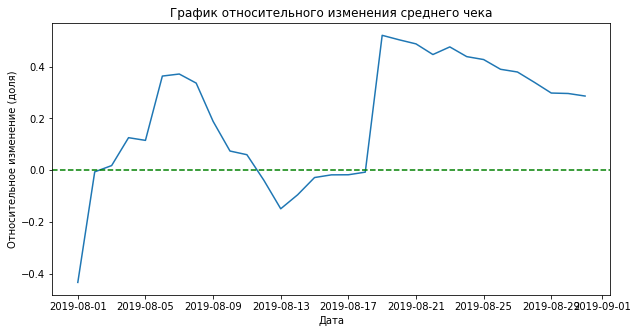

In [15]:
# график относительного изменения среднего чека B к A

merged_cumulative_revenue = cumulative_A.merge(cumulative_B, how='left', on='date', suffixes=['_A', '_B'])

plt.figure(figsize=(10,5))
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_B']/merged_cumulative_revenue['orders_B']/(merged_cumulative_revenue['revenue_A']/merged_cumulative_revenue['orders_A']))-1)
plt.axhline(y=0, color='green', linestyle='--')
plt.title('График относительного изменения среднего чека')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение (доля)')
plt.show()

В первую дату средний чек группы B был ниже, затем мы видим уверенный рост и уменьшение разницы, начиная с 5 августа, 18-19 августа были сделаны покупки на большие суммы и разница увеличилась, что сделало отношение среднего чека B к A на уровне 0,5 и далее идет плавный спад разницы в значениях.

Аналогичным образом рассмотрим график кумулятивной конверсии и относительного различия кумулятивных конверсий.

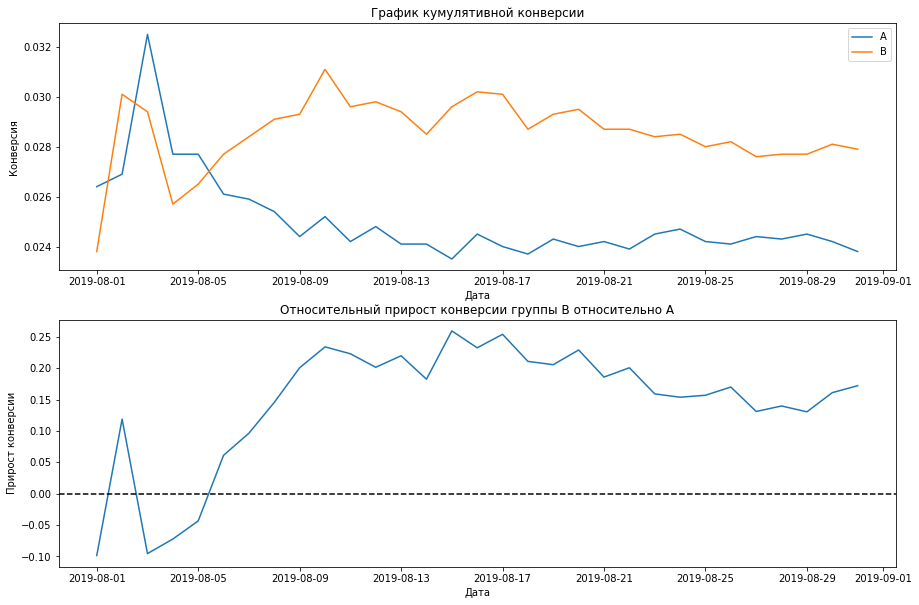

In [16]:
# график кумулятивной конверсии и относительного изменения конверсии
merged_cumulative_conv = cumulative_A[['date','conversion']].merge(cumulative_B[['date','conversion']], how='left', on='date', suffixes=['_A','_B'])

fig, ax = plt.subplots(2,1, figsize=(15,10))
ax[0].plot(cumulative_A['date'], cumulative_A['conversion'], label='A')
ax[0].plot(cumulative_B['date'], cumulative_B['conversion'], label='B')
ax[0].set_title('График кумулятивной конверсии')
ax[0].set_xlabel('Дата')
ax[0].set_ylabel('Конверсия')
ax[0].legend()

ax[1].plot(merged_cumulative_conv['date'], merged_cumulative_conv['conversion_B']/merged_cumulative_conv['conversion_A']-1)
ax[1].set_title('Относительный прирост конверсии группы B относительно A')
ax[1].set_xlabel('Дата')
ax[1].set_ylabel('Прирост конверсии')
ax[1].axhline(y=0, color='black', linestyle='--')

plt.show()

По графику кумулятивной конверсии мы видим, что группа B, после стабилизации показателей, начиная с 6 августа, имеет конверсию выше, чем группа А. Оба графика колебались в начале тестирования, но затем конверсия группы B вышла вперед, а группы A уменьшилась и оба графика зафиксировались.

На графике относительного различия кумулятивных конверсий видим, что группа B проигрывала группе A в начале тестирования и после роста опять просела на небольшой период, затем ее конверсия только росла, причем значительно, установив прирост в 0.2 единицы к концу периода.

Рассмотрим количество заказов по пользователям и стоимость заказов.

In [17]:
# подсчет количества заказов по пользователям

orders_by_user = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_by_user.columns = ['visitorId', 'orders']
orders_by_user.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


По сводной таблице мы видим, что максимальное количество заказов на пользователя - 3, рассмотрим на гистограмме распределение количества заказов на одного пользователя.

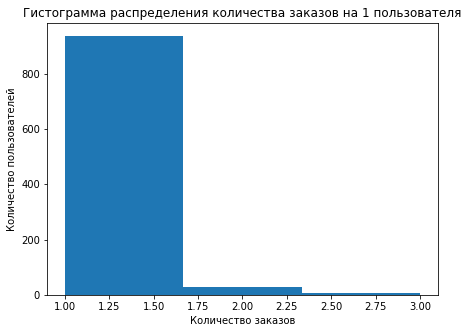

In [18]:
# гистограмма распределения количества заказов на 1 пользователя 
plt.figure(figsize=(7,5))
plt.hist(orders_by_user['orders'], bins=3)
plt.title('Гистограмма распределения количества заказов на 1 пользователя')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')
plt.show()

Большинство покупателей делали только 1 заказ, также, относительно небольшое количество покупателей сделало 2 заказа, покупатели с 3 заказами скорее исключения. Построим точечную диаграмму.

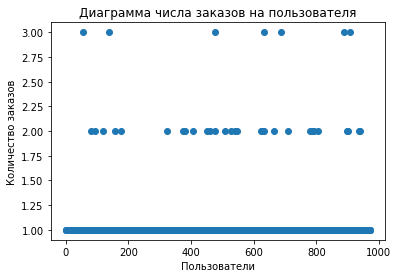

In [19]:
# точечная диаграмма числа заказов на пользователя
x_ticks = pd.Series(range(0, len(orders_by_user)))
plt.scatter(x_ticks, orders_by_user['orders'])
plt.title('Диаграмма числа заказов на пользователя')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show()

Также, как и на гистограмме, большое количество пользователей с 1 заказом. Чтобы понять, сколько заказов считать аномалиями посчитаем выоборочные перцентили количества заказов на одного пользователя.

In [20]:
# подсчет выборочных перцентелей по числу заказов

np.percentile(orders_by_user['orders'], [90,95,99])

array([1., 1., 2.])

Не более 5% пользователей оформляли больше одного заказа и только 1% пользователей совершили больше 2 заказов. Чтобы уменьшить влияние аномалий на конверсию, определим границей нормальных значений количество заказов в 2 единицы. 

Рассмотрим стоимости совершенных заказов и определим аномальные заказы по стоимости, что должно дать более значимые результаты, так как по построенным ранее графикам мы видели, что у группы B происходит резкий рост метрик, завязанных на выручке, 19 августа.  

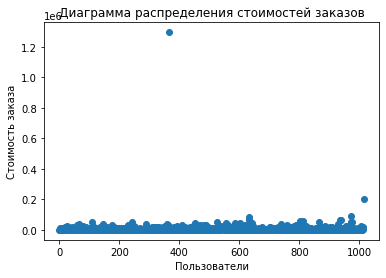

In [21]:
# точечная диаграмма распределения стоимостей заказов
x_ticks = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_ticks, orders['revenue'])
plt.title('Диаграмма распределения стоимостей заказов')
plt.ylabel('Стоимость заказа')
plt.xlabel('Пользователи')
plt.show()

По точечной диаграмме заметно выделяется один заказ на сумму свыше 1 200 000 усл. единиц и один заказ немногим выше 200 000 усл. единиц, при том что все остальные заказы имеют стоимость значительно ниже.

In [22]:
orders.query('revenue >= 200000')

,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B


Заказ на сумму 1 294 500, как и предполагалось, искажает графики, так как он в несколько раз превышает стоимость любого другого заказа, совершенного во время проведения A/B теста, поэтому группа B имеет резкий скачок всех метрик, основанных на выручке, 19 августа.

Также, при помощи расчета перцентелей, определим границу нормальных значений суммы заказа.

In [23]:
# расчет перцентелей среднего чека

np.percentile(orders['revenue'], [90,95,99])

array([17990., 26785., 53904.])

Не более 5% пользователей совершали заказ на сумму свыше 26 785 усл. единиц, и не более 1% - на сумму выше 53 904 усл. ед.

Расчет перцентелей позволяет сделать вывод, что на итоговые результаты сравнения метрик группы B и A повлияли заказы с аномально высокой ценой, которые мы увидели на диаграмме. Так как мы не располагаем данными об асортименте интернет-магазина, предположить с чем может быть связана значительно повышенная стоимость чека у 1% заказов мы не можем.

**Вывод**

Проанализировав графики накопленных метрик мы получили следующие выводы:
- Выручка растет равномерно до 19.08, график группы B имеет резкий рост в указанную дату, что может сигнализировать о всплеске числа заказов, либо о появлении аномально дорогих заказов в данный период, так как после всплеска рост обоих графиков симметричен.
- Средний чек группы B также имеет резкий рост 19.08, и затем идет равномерно вниз, что подтверждает присутствие заказов с аномально высокой стоимостью у группы B. Также, мы видим, что рост не равномерный и говорить о том, что средний чек группы B до очистки данных от аномалий не можем.
- В первую дату средний чек группы B был ниже, затем мы видим уверенный рост и уменьшение разницы, начиная с 5 августа, 119 августа были сделаны покупки на большие суммы и разница увеличилась, что сделало отношение среднего чека B к A на уровне 0,5 и далее идет плавный спад разницы в значениях.
- По графику кумулятивной конверсии мы видим, что группа B, после стабилизации показателей, начиная с 6 августа, имеет конверсию выше, чем группа А. Оба графика колебались в начале тестирования, но затем конверсия группы B вышла вперед, а группы A уменьшилась и оба графика зафиксировались.
- На графике относительного различия кумулятивных конверсий видим, что группа B проигрывала группе A в начале тестирования и после роста опять просела на небольшой период, затем ее конверсия только росла, причем значительно, установив прирост в 0.2 единицы к концу периода.
- Не более 5% пользователей оформляли больше одного заказа и только 1% пользователей совершили больше 2 заказов.
- Не более 5% пользователей совершали заказ на сумму свыше 26 785 усл. единиц, и не более 1% - на сумму выше 53 904 усл. ед.

Мы определили, что "аномальными" пользователями считаются те, кто сделал больше 2 заказов и чья сумма заказа была выше 53 904 усл. единиц.
Следующим этапом - посчитаем статистическую значимость различий в расчитанных метриках между группами по "сырым" и "очищенным" данным и сделаем выводы по результатам теста.

#### Расчет статистической значимости различий в метриках по группам A/B-теста (не очищенные данные)

Расчитаем статистическую значимость различий в конверсии и среднем чеке между группами по "сырым" данным - то есть, без удаления аномальных пользователей, определенных в предыдущем этапе исследования.

Соберем для расчета статистики сырые данные в общую таблицу

In [24]:
# подготовка таблиц для статистических тестов

#количество пользователей по датам - группа А
visitors_A_daily = visitors[visitors['group'] == 'A'][['date','visitors']]
visitors_A_daily.columns = ['date', 'visitors_per_date_A']
visitors_A_cumulative = visitors_A_daily.apply(lambda x: visitors_A_daily[visitors_A_daily['date'] <= x['date']].agg({'date':'max', 'visitors_per_date_A':'sum'}), axis = 1)
visitors_A_cumulative.columns = ['date', 'visitors_cumulative_A']

#количество пользователей по датам - группа В
visitors_B_daily = visitors[visitors['group'] == 'B'][['date','visitors']]
visitors_B_daily.columns = ['date', 'visitors_per_date_B']
visitors_B_cumulative = visitors_B_daily.apply(lambda x: visitors_B_daily[visitors_B_daily['date'] <= x['date']].agg({'date':'max', 'visitors_per_date_B':'sum'}), axis = 1)
visitors_B_cumulative.columns = ['date', 'visitors_cumulative_B']

#количество и сумма заказов по датам - группа А
orders_A_daily = orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId','revenue']].groupby('date', as_index=False).agg({'transactionId': pd.Series.nunique, 'revenue':'sum'})
orders_A_daily.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']
orders_A_cumulative = orders_A_daily.apply(
    lambda x: orders_A_daily[orders_A_daily['date'] <= x['date']].agg({'date':'max', 'orders_per_date_A':'sum', 'revenue_per_date_A':'sum'}), axis = 1
).sort_values(by=['date'])
orders_A_cumulative.columns = ['date','orders_cumulative_A','revenue_cumulative_A']

#количество и сумма заказов по датам - группа В
orders_B_daily = orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId','revenue']].groupby('date', as_index=False).agg({'transactionId':pd.Series.nunique, 'revenue':'sum'})
orders_B_daily.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']
orders_B_cumulative = orders_B_daily.apply(
    lambda x: orders_B_daily[orders_B_daily['date'] <= x['date']].agg({'date':'max', 'orders_per_date_B':'sum', 'revenue_per_date_B':'sum'}), axis = 1
).sort_values(by=['date'])
orders_B_cumulative.columns = ['date','orders_cumulative_B','revenue_cumulative_B']

#общая таблица сырых данных
data = (
    orders_A_daily.merge(
    orders_B_daily, how='left', on='date')
    .merge(orders_A_cumulative, how='left', on='date')
    .merge(orders_B_cumulative, how='left', on='date')
    .merge(visitors_A_daily, how='left', on='date')
    .merge(visitors_B_daily, how='left', on='date')
    .merge(visitors_A_cumulative, how='left', on='date')
    .merge(visitors_B_cumulative, how='left', on='date')
)
data.head(5)

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cumulative_A,revenue_cumulative_A,orders_cumulative_B,revenue_cumulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cumulative_A,visitors_cumulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Сырые данные собраны, посчитаем статистическую значимость различия в конверсии между группами А и В.

In [25]:
# таблицы пользователей, совершивших хотя бы один заказ с количеством совершенных заказов

orders_by_A = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_A.columns = ['visitorId', 'orders']

orders_by_B = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})
orders_by_B.columns = ['visitorId', 'orders']

# переменные с пользователями по каждой группе и количеству совершенных ими заказов

sample_A = pd.concat([orders_by_A['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_A['orders'])), name='orders')], axis=0)
sample_B = pd.concat([orders_by_B['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_B['orders'])), name='orders')], axis=0)

<font color='#000080'>**Нулевая гипотеза: H0 - Статистически значимых различий в конверсии между группами A и B нет;**

**Альтернативная гипотеза: H1 - Статистически значимые различия в конверсии между группами есть.**</font>

Проверять гипотезы будем критерием Манна-Уитни, так как его условия применения соответствуют нашей ситуации:
1. Сравниваемые значения не составляют пару коррелирующих значений;
2. Распределение признаков в каждой выборке (А и В) может не соответствовать нормальному распределению.

Возьмем для проверки стандартный уровень значимости, равный 0.05

In [26]:
alpha = 0.05
print("p_value = {0:.4f}".format(st.mannwhitneyu(sample_A, sample_B, alternative = 'two-sided')[1]))
print("относительный прирост конверсии группы В: {0:.4f}".format(sample_B.mean() / sample_A.mean() - 1))

if st.mannwhitneyu(sample_A, sample_B, alternative = 'two-sided')[1] > alpha:
    print('Статистически значимых различий в конверсии между группами нет, гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть')

p_value = 0.0110
относительный прирост конверсии группы В: 0.1598
Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть


Таким образом, по критерию Манна-Уитни, мы можем говорить о наличии статистически значимых различий в конверсии между группами, также это подтверждается относительным приростом конверсии группы В по сырым данным, который составляет почти 16%. 

Проверим аналогичные гипотезы о различии в среднем чеке между исследуемыми группами:

<font color='#000080'>**Нулевая гипотеза: H0 - Статистически значимых различий в стоимости среднего чека между группами A и B нет;**
    
**Альтернативная гипотеза: H1 - Статистически значимые различия в стоимости среднего чека между группами есть.**
</font>

In [27]:
print("p_value = {0:.4f}".format(st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'], alternative = 'two-sided')[1]))
print("относительный прирост размера среднего чека В: {0:.4f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

if st.mannwhitneyu(orders[orders['group'] == 'A']['revenue'], orders[orders['group'] == 'B']['revenue'], alternative = 'two-sided')[1] > alpha:
    print('Статистически значимых различий в среднем чеке между группами нет, гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу, статистически значимые различия в среднем чеке между группами есть')

p_value = 0.8295
относительный прирост размера среднего чека В: 0.2866
Статистически значимых различий в среднем чеке между группами нет, гипотезу не отвергаем


P_value значительно выше уровня значимости, поэтому причин отвергать нулевую гипотезу и считать, что в среднем чеке пользователей есть различия, нет.

Но по метрике относительного прироста размера среднего чека мы видим, что средний чек в группе B значительно выше, чем в группе A, на целых 28,7%. В данном случае мы помним, что в группе B имеются аномально высокие средние чеки по сделанным покупкам, превышающие средний чек большинства пользователей в несколько раз, поэтому в следующем этапе исследования мы выполним проверку уже с очищенными данными.

#### Расчет статистической значимости различий в метриках по группам A/B-теста (очищенные данные)

Принимая за аномалии тех пользователей, которые совершили более 2 заказов, мы уберем 1% пользователей с наибольшим числом заказов.

Если считать аномалиями пользователей с суммой чека более 53 904 усл. ед., данные будут очищены от 1% аномально дорогих заказов.

Комбинируя оба условия, получим срезы аномальных пользователей.

In [28]:
# получение среза аномальных пользователей

abn_orders = pd.concat(
    [orders_by_A[orders_by_A['orders'] > 2]['visitorId'],
    orders_by_B[orders_by_B['orders'] > 2]['visitorId']
    ], axis = 0
)

abn_revenue = orders[orders['revenue'] > 53904]['visitorId']
abn_users = (
    pd.concat([abn_orders, abn_revenue], axis=0).drop_duplicates().sort_values()
)
display(abn_users)
abn_users.shape

1099     148427295
33       249864742
58       611059232
949      887908475
744      888512513
1103    1164614297
1136    1307669133
425     1920142716
1196    2108080724
211     2108163459
347     2742574263
310     2988190573
409     3908431265
416     3967698036
940     4003628586
743     4133034833
Name: visitorId, dtype: int64

(16,)

Таким образом, мы получили 16 аномальных пользователей. Теперь расчитаем статистическую значимость различий в конверсии между группами А/B теста по очищенным данным.

In [29]:
# очистка данных по количеству заказов
sample_A_filtered = pd.concat([orders_by_A[np.logical_not(orders_by_A['visitorId'].isin(abn_users))]['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_A'].sum() - len(orders_by_A['orders'])), name='orders')], axis=0)
sample_B_filtered = pd.concat([orders_by_B[np.logical_not(orders_by_B['visitorId'].isin(abn_users))]['orders'], pd.Series(0, index=np.arange(data['visitors_per_date_B'].sum() - len(orders_by_B['orders'])), name='orders')], axis=0)

По очищенным данным проверим нулевую гипотезу:

<font color='#000080'>**Нулевая гипотеза: H0 - Статистически значимых различий в конверсии между группами A и B по очищенным данным без учета пользователей с аномально высоким количеством заказов нет;**

**Альтернативная гипотеза: H1 - Статистически значимые различия в конверсии между группами по очищенным данным без учета пользователей с аномально высоким количеством заказов есть.**</font>

In [30]:
# применение критерия к очищенным данным

print("p_value = {0:.4f}".format(st.mannwhitneyu(sample_A_filtered, sample_B_filtered, alternative = 'two-sided')[1]))
print("относительный прирост конверсии группы В: {0:.4f}".format(sample_B_filtered.mean() / sample_A_filtered.mean() - 1))

if st.mannwhitneyu(sample_A_filtered, sample_B_filtered)[1] > alpha:
    print('Статистически значимых различий в конверсии между группами нет, гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть')

p_value = 0.0070
относительный прирост конверсии группы В: 0.1892
Отвергаем нулевую гипотезу, статистически значимые различия в конверсии между группами есть


Результаты теста с очищенными данными также подтверждают наличие различий в конверсии между группами. Хотя общий вывод по результатам теста не изменился, мы видим относительный прирост конверсии у группы B еще выше, с 16% он вырос почти до 19%.

Проведем тест с очищенными данными по среднему чеку:

<font color='#000080'>**Нулевая гипотеза: H0 - Статистически значимых различий в стоимости среднего чека между группами A и B по очищенным от аномально дорогих заказов данным нет;**
    
**Альтернативная гипотеза: H1 - Статистически значимые различия в стоимости среднего чека между группами по очищенным от аномально дорогих заказов данным есть.**
</font>

In [31]:
# очищенные данные для теста по различию среднего чека

bill_A = orders[np.logical_and(orders['group'] == 'A', np.logical_not(orders['visitorId'].isin(abn_users)))]['revenue']
bill_B = orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitorId'].isin(abn_users)))]['revenue']

# применение критерия для определения различий в среднем чеке по очищенным данным 
print("p_value = {0:.4f}".format(st.mannwhitneyu(bill_A, bill_B, alternative = 'two-sided')[1]))
print("относительный прирост размера среднего чека В: {0:.4f}".format(bill_B.mean()/bill_A.mean()-1))

if st.mannwhitneyu(bill_A, bill_B, alternative = 'two-sided')[1] > alpha:
    print('Статистически значимых различий в среднем чеке между группами нет, гипотезу не отвергаем')
else:
    print('Отвергаем нулевую гипотезу, статистически значимые различия в среднем чеке между группами есть')

p_value = 0.7877
относительный прирост размера среднего чека В: -0.0323
Статистически значимых различий в среднем чеке между группами нет, гипотезу не отвергаем


Результат теста не изменился, статистически значимых различий в среднем чеке между группами A и B нету, однако теперь мы видим, как сильно влияли на метрики аномально дорогие единичные заказы. В очищенных данных относительный прирост размера среднего чека группы B -3,2% - что свидетельствует о том, что средний чек у группы B меньше, чем у группы A.

### Выводы по анализу A/B-теста

- Есть статистически значимое различие по конверсии между группами, как по сырым, так и по очищенным данным; Конверсия у группы B выше на 18,9%, что подтверждает успешность нововведений в части увеличения конверсии;
- Статистически значимых различий по среднему чеку нет как в сырых, так и в очищенных от аномалий данных; При этом, в очищенных данных относительный прирост размера среднего чека группы B -3,2%, что свидетельствует о том, что нововведения, которые тестировались на группе B, не привели к росту среднего чека покупателей.

Таким образом, можно остановить тест и признать его успешным, так как по конверсии мы видим, что группа B стастистически значимо лучше группы A, а по показателю среднего чека мы видим, что исследуемые в A/B-тестировании изменения не увеличивают размер среднего чека покупателей и статистически значимых различий в среднем чеке между группами нет.